In [66]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
import json
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [29]:
np.random.seed(42)

def open_dataset(filename):
    return pd.read_csv(filepath_or_buffer=filename, delimiter=",", encoding="utf-8", header=0)

data = open_dataset('KaDo_clean.csv')
# with open('customers_output.json', 'r') as customers_output:
# 	Customers_json_data = json.load(customers_output)


# Customers_data = open_dataset('customers_output.json')
# Products_data = open_dataset('products_output.json')

#print(Customers_json_data)
data.head(50)
# data_needed = data[data['CLI_ID'], data['MAILLE']]
# data_needed.head(10)

,TICKET_ID,MOIS_VENTE,PRIX_NET,FAMILLE,UNIVERS,MAILLE,LIBELLE,CLI_ID
0,35592159,10,7.45,soins-du-visage,vis-cjour-jeunes-specifique,vis-jeune-et-levre,cr-jr-parf-bio-spe-ac-sent-50ml,1490281
1,35592159,10,5.95,soins-du-visage,vis-demaq-aaar,vis-aaar-demaqlotion,eau-micellaire-3-thes-fl200ml,1490281
2,35509899,9,13.00,parfumage,parf-eaux-parfums,parf-parfum,edt-un-matin-au-jardin-100ml-muguet,13290776
3,36417517,12,11.04,parfumage,parf-eaux-parfums,parf-parfum,edt-un-matin-au-jardin-100ml-lilas,13290776
4,36417517,12,10.55,parfumage,parf-eaux-parfums,parf-parfum,edt-un-matin-au-jardin-100ml-lilas,13290776
5,36417517,12,5.63,soins-du-corps,corps-lait-huile-parfums,corps-hydr-lait-huile,lait-lilas-fp-fl200ml,13290776
6,35509899,9,5.50,soins-du-corps,corps-lait-huile-plaisirnature,corps-hydr-lait-huile,lait-veloute-coco-pn2-400ml,13290776
7,33002894,1,7.45,maquillage,maq-lev-ral-brillance,maq-lev-ral-hmg,ral-brillanc-gel-pralin-cn3-2g,20163348
8,33064616,1,5.45,soins-du-visage,vis-cjour-jeunes-specifique,vis-jeune-et-levre,cr-jour-px-mix-hydra-veg-p50ml,20200041
9,34233630,5,5.95,maquillage,maq-lev-ral-brillance,maq-lev-ral-hmg,ral-brill-marron-glace12-cn3-3-5g,20791601


In [23]:
# Customers_json_data = json.loads(Customers_data)
dfSeries = []
df = pd.DataFrame(list(my_dict.items()),columns = ['column1','column2']) 

for key in Customers_json_data:
    df = pd.DataFrame({"client_id"  : [key], "order_price_average" : [Customers_json_data[key]['order_price_average']]})
    dfSeries.append(df)
    #print(dfSeries)

# dataFrame = pd.read_json(path_or_buf=Customers_json_data)
# df=pd.DataFrame.from_dict(Customers_json_data)
#filtered_list = df['products_price_average']

for item in dfSeries:
    print(item)


  client_id  order_price_average
0   1490281                 18.4
  client_id  order_price_average
0  13290776                27.75
  client_id  order_price_average
0  20163348                 7.45
  client_id  order_price_average
0  20200041                  6.7
  client_id  order_price_average
0  20561854                 7.05
  client_id  order_price_average
0  20727324                6.625
  client_id  order_price_average
0  20791601                 23.8
  client_id  order_price_average
0  21046542                33.24
  client_id  order_price_average
0  21239163                12.65
  client_id  order_price_average
0  21351166                  7.4
  client_id  order_price_average
0  21497331                33.35
  client_id  order_price_average
0  21504227                 1.95
  client_id  order_price_average
0  21514622                 17.9
  client_id  order_price_average
0  69813934              7.35625
  client_id  order_price_average
0  71891681               22.125
  client_i

In [67]:
data_filtered = data.sort_values(by=['FAMILLE', 'UNIVERS', 'MAILLE'], ascending=[True, True, True])
data_filtered = data_filtered.drop_duplicates(subset=['MAILLE'])
mlen = len(data_filtered)
idList = [i+1 for i in range(mlen)]
data_filtered['PRODUCT_ID'] = idList
data_filtered = data_filtered[['MAILLE','PRODUCT_ID', 'PRIX_NET', 'CLI_ID']]

data_filtered = data_filtered.sort_values(by=['CLI_ID'], ascending=[True])
data_filtered = data_filtered.drop_duplicates(subset=['CLI_ID'])
newLen = len(data_filtered)
userIdList = [i+1 for i in range(newLen)]
data_filtered['USER_ID'] = userIdList
data_filtered.reset_index(drop=True, inplace=True)
data_filtered.head()

,MAILLE,PRODUCT_ID,PRIX_NET,CLI_ID,USER_ID
0,vis-aaar-demaqlotion,32,5.95,1490281,1
1,maq-teint,14,6.95,20791601,2
2,vis-bio,29,6.45,21046542,3
3,maq-yeux-masca-hg,17,11.45,85841284,4
4,corps-hydr-lait-huile,23,6.95,169985247,5


<AxesSubplot:xlabel='USER_ID', ylabel='PRODUCT_ID'>

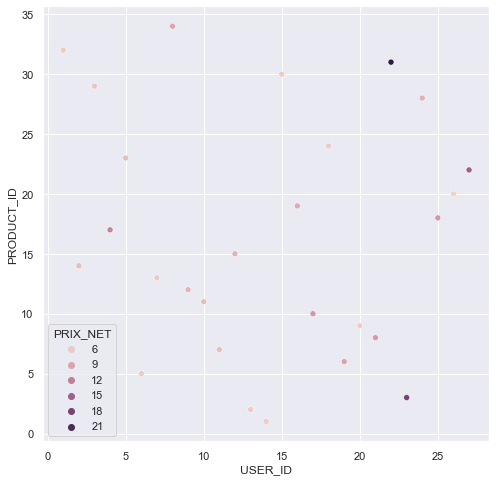

In [59]:
# plt.figure(figsize=(10,10))
# plt.scatter(data['CLI_ID'],data['PRIX_NET'],s=15,color='blue')
# plt.title('Dataset',fontsize=20)
# plt.xlabel('Feature 1',fontsize=14)
# plt.ylabel('Feature 2',fontsize=14)
# plt.show()

# filtered_list.plot(x='index', y='products_price_average')
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(data=data_filtered, x='USER_ID', y='PRODUCT_ID', hue='PRIX_NET')

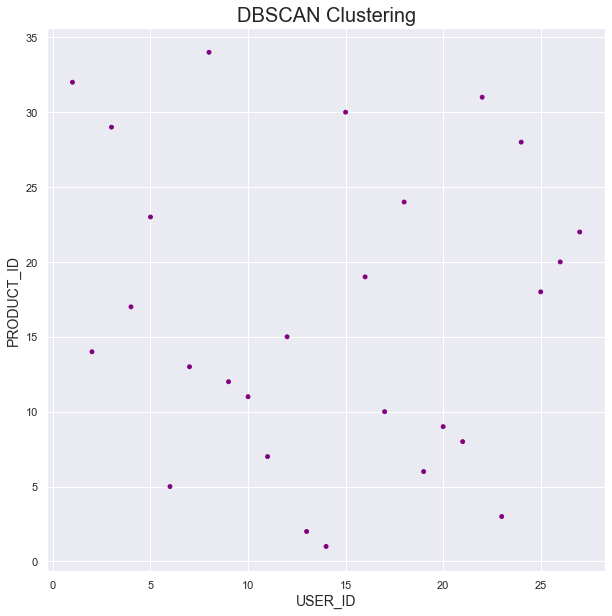

In [69]:
dbscan=DBSCAN()
dbscan.fit(data_filtered[['USER_ID', 'PRODUCT_ID']])
data_filtered['DBSCAN_labels']=dbscan.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(data_filtered['USER_ID'],data_filtered['PRODUCT_ID'],c=data_filtered['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('USER_ID',fontsize=14)
plt.ylabel('PRODUCT_ID',fontsize=14)
plt.show()

# All the data points are now of purple color which means they are treated as noise. 
# It is because the value of epsilon is very small and we didn’t optimize parameters

In [74]:
# For epsilon, I am using the K-distance graph. For plotting a K-distance Graph, we need the distance between a point 
# and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors.

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_filtered[['USER_ID', 'PRODUCT_ID']])
distances, indices = nbrs.kneighbors(data_filtered[['USER_ID', 'PRODUCT_ID']])
print(distances)

[[0.         3.60555128]
 [0.         3.60555128]
 [0.         3.60555128]
 [0.         3.60555128]
 [0.         6.08276253]
 [0.         5.38516481]
 [0.         2.23606798]
 [0.         7.07106781]
 [0.         1.41421356]
 [0.         1.41421356]
 [0.         4.12310563]
 [0.         4.24264069]
 [0.         1.41421356]
 [0.         1.41421356]
 [0.         6.70820393]
 [0.         5.38516481]
 [0.         3.16227766]
 [0.         5.38516481]
 [0.         2.82842712]
 [0.         1.41421356]
 [0.         1.41421356]
 [0.         3.60555128]
 [0.         5.        ]
 [0.         3.60555128]
 [0.         2.23606798]
 [0.         2.23606798]
 [0.         2.23606798]]


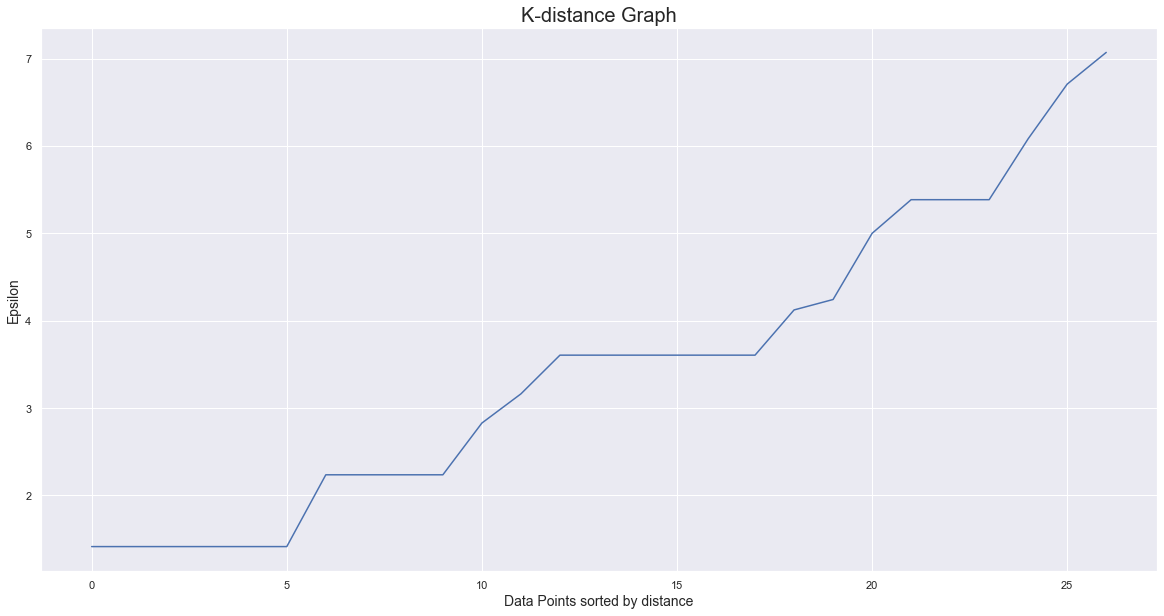

In [79]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

# The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 7 in this case

In [119]:
dbscan_opt=DBSCAN(eps=4,min_samples=5)
dbscan_opt.fit(data_filtered[['USER_ID', 'PRODUCT_ID']])

data_filtered['DBSCAN_opt_labels']=dbscan_opt.labels_
data_filtered['DBSCAN_opt_labels'].value_counts()

# if we choose Epsilon value = 4, we can see that it creates no clusters and all the points are considered as the outliers

-1    27
Name: DBSCAN_opt_labels, dtype: int64

In [118]:
dbscan_opt=DBSCAN(eps=5,min_samples=5)
dbscan_opt.fit(data_filtered[['USER_ID', 'PRODUCT_ID']])

data_filtered['DBSCAN_opt_labels']=dbscan_opt.labels_
data_filtered['DBSCAN_opt_labels'].value_counts()

# if we choose Epsilon value = 5, we can see that there's atleast two cluster group

-1    17
 0     5
 1     5
Name: DBSCAN_opt_labels, dtype: int64

In [121]:
dbscan_opt=DBSCAN(eps=6,min_samples=3)
dbscan_opt.fit(data_filtered[['USER_ID', 'PRODUCT_ID']])

data_filtered['DBSCAN_opt_labels']=dbscan_opt.labels_
data_filtered['DBSCAN_opt_labels'].value_counts()

# if we choose Epsilon value = 6 and with min_samples = 3, we can see that it creates more than two clusters groups now!

 0    12
-1     7
 1     5
 2     3
Name: DBSCAN_opt_labels, dtype: int64

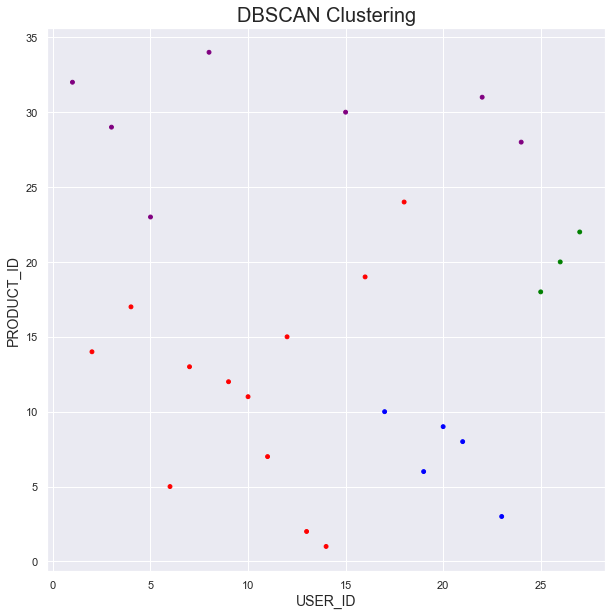

In [122]:
# Plotting the resulting clusters

plt.figure(figsize=(10,10))
plt.scatter(data_filtered['USER_ID'],data_filtered['PRODUCT_ID'],c=data_filtered['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('USER_ID',fontsize=14)
plt.ylabel('PRODUCT_ID',fontsize=14)
plt.show()